In [32]:
import os
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 
from matplotlib import pyplot as plt
import numpy as np

In [33]:
DATA_DIR = "../data/"

In [34]:
trainingFile = os.path.join(DATA_DIR,"train.txt")

In [35]:
'''
Function to read the file and return a dictionary that stores the data according to its BIO tag
e.g. 
data = {
        'O':['the','and'],
        'B-location':['London','Paris']
        }
and so on.
Also I noticed an empty line in the text file denotes end of a sentence. So I am returning all senetences present in the file 
too.
Also the BIO tags for each word in a sentence are stored in the list allTags
'''
def read_file(filename):
    #open the file
    trainFpt = open(filename,"r")
    
    #dictionary that stores the data according to its BIO tag
    data={}
    
    # BIO tags for each word in all sentences
    allTags=[]
    #BIO tags in current sentence
    currentTags=[]

    #store the current sentence in this list
    currentSentence=[]
    #list to store all sentences in the file
    allSentences=[]
    for line in trainFpt:
        
        lineSplit = line.split()
        
        #if line is empty it indicates end of the sentence. Append the current sentence to allSentences and reinitialize
        #currentSentence to an empty list
        if len(lineSplit)==0:
            allSentences.append(currentSentence)
            allTags.append(currentTags)
            currentSentence=[]
            currentTags=[]
        
        #else add the word to the corresponding BIO label in the dictionary and add the word to the current sentence
        else:
            word,iobTag = lineSplit[0],lineSplit[1]
            currentSentence.append(word)
            currentTags.append(iobTag)
            try:
                data[iobTag].append(word)
            except:
                data[iobTag]=[word]
    

    trainFpt.close()
    
    return data,allSentences,allTags

In [36]:
train_data,sentences,tags = read_file(trainingFile)

In [37]:
assert len(sentences[100])==len(tags[100])
assert len(sentences[900])==len(tags[900])
assert len(sentences[1200])==len(tags[1200])
assert len(sentences[1700])==len(tags[1700])

In [40]:
print(sentences[3000])
print(tags[3000])

['@trippy_tay', '::', '[', 'Mixtape', ']', 'Criminal', 'Manne', '-', 'Trap', 'Talk', '::', 'Jan', '.', '30th', '!', 'http://t.co/2HixTIfmvL', '@LiveMixtapes', '@Trapaholics', '@Criminal_Manne']
['O', 'O', 'O', 'O', 'O', 'B-person', 'I-person', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


In [9]:
#save the extracted sentences and their corresponding tags
sentences = np.array(sentences,dtype=np.object)
tags = np.array(tags,dtype=np.object)
np.save(os.path.join(DATA_DIR,"sentences.npy"),sentences)
np.save(os.path.join(DATA_DIR,"tags.npy"),tags)

In [10]:
#these are all the BIO classes that we need to identify for each word.
train_data.keys()

dict_keys(['O', 'B-location', 'I-location', 'B-group', 'B-corporation', 'B-person', 'B-creative-work', 'B-product', 'I-person', 'I-creative-work', 'I-corporation', 'I-group', 'I-product'])

In [11]:
x = list(train_data.keys())
y = [len(train_data[k]) for k in x]

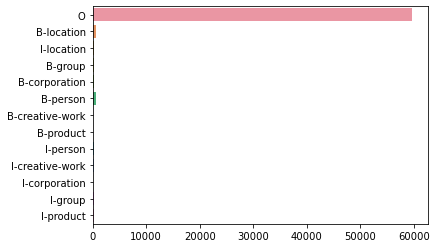

In [12]:
#it can be seen that words with tags 'O' dominate the data set. Metrics like accuracy won't be useful here due to this class
#imbalance
sns.barplot(x=y, y=x)

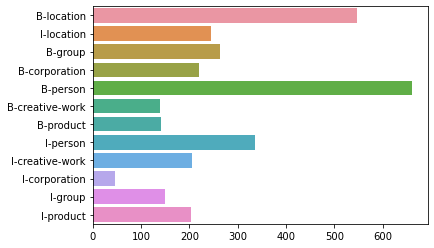

In [13]:
#this is distribution of data without 'O'. Most of the classes have less than 300 samples. 
x = list(train_data.keys())
x.remove('O')
y = [len(train_data[k]) for k in x]
sns.barplot(x=y, y=x)

In [14]:
#function to plot the word cloud for any given BIO tag.
#input is the BIO tag we want to plot and whether to consider stop words
#output is the word cloud
def plot_word_cloud(dataClass,considerStopwords=False):
    
    #decide whether to eliminate stop words from the word cloud or not. setting it to True will eliminate stop words
    if considerStopwords:
        stopwords = set(STOPWORDS) 
    else:
        stopwords = None
        
    #calculate the word cloud
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = None, 
                    min_font_size = 10).generate(" ".join(train_data[dataClass])) 

    # plot the WordCloud image  
    plt.figure(figsize = (7, 7), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title("Plot for "+dataClass)
    plt.show() 

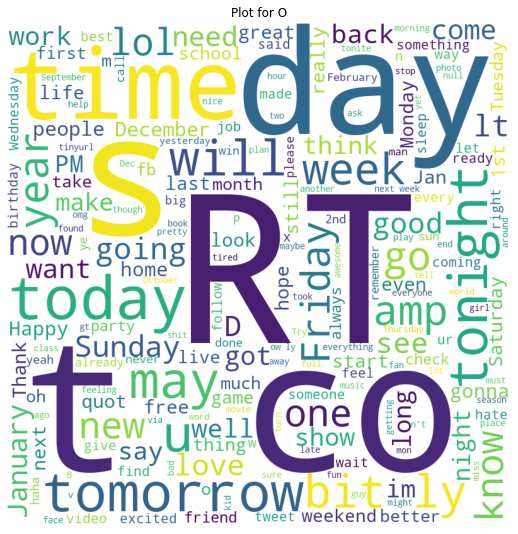

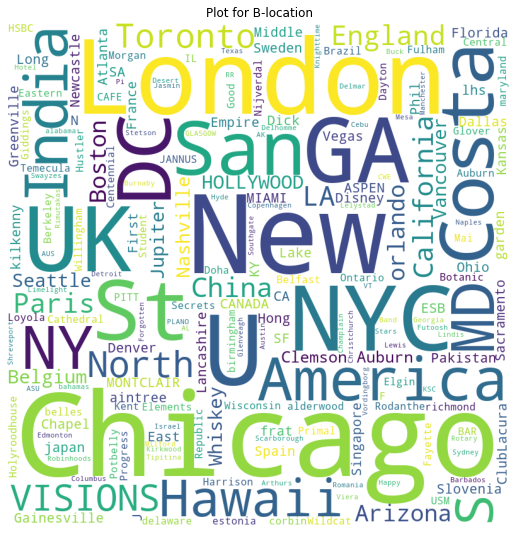

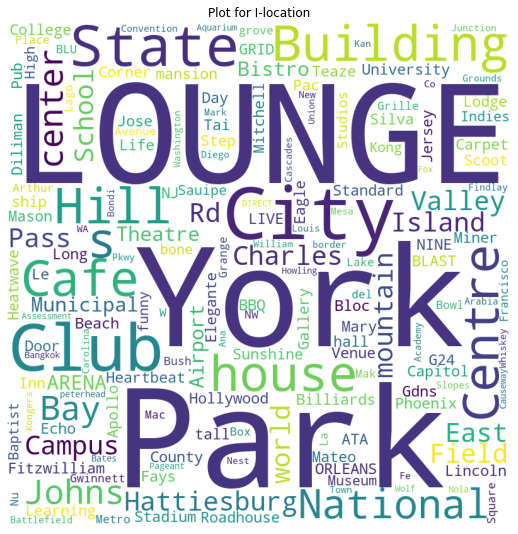

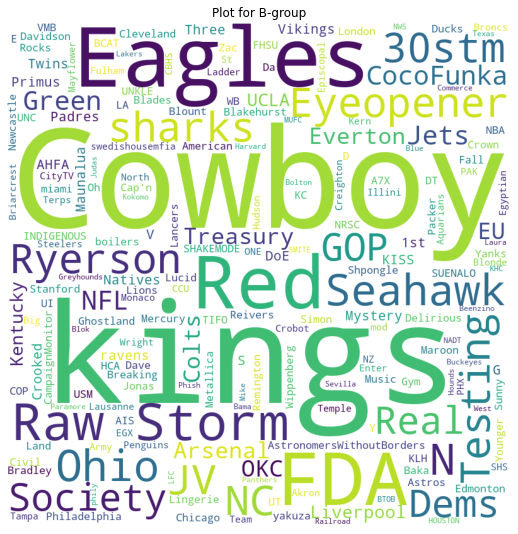

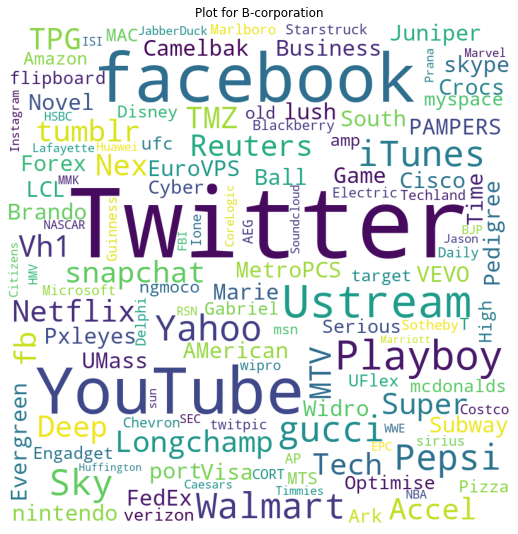

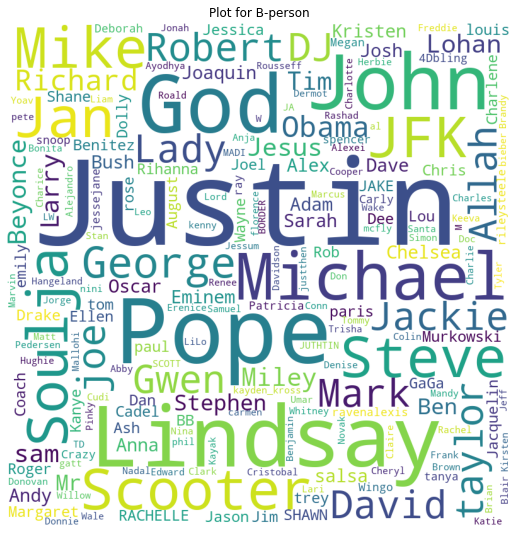

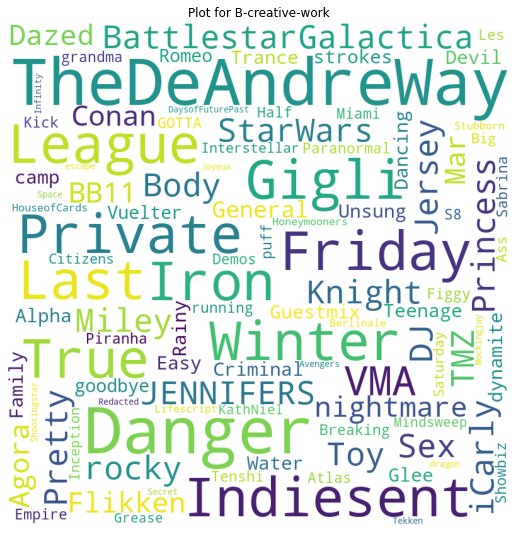

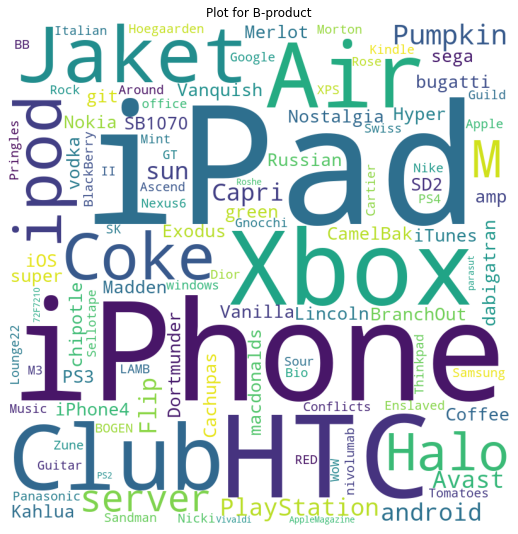

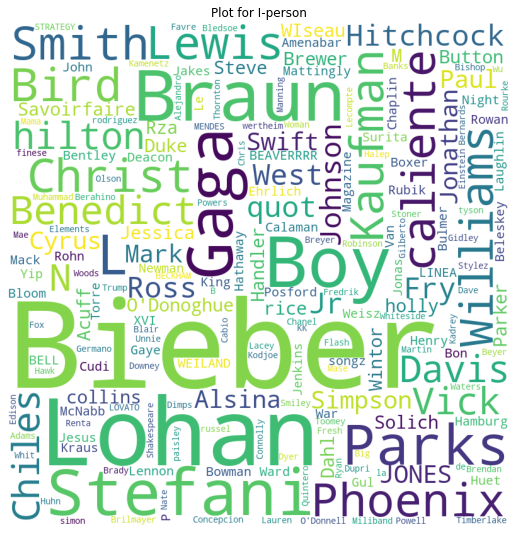

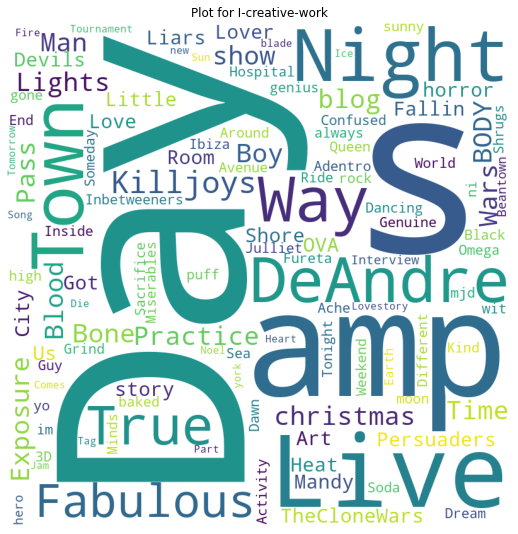

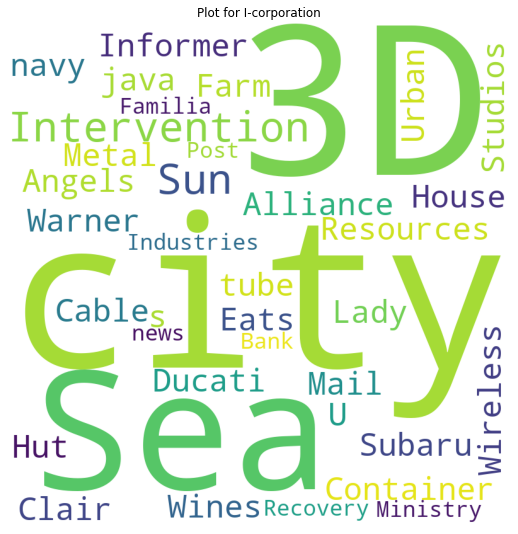

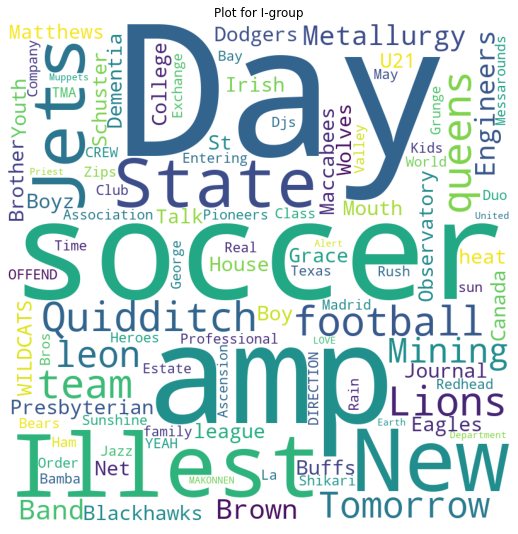

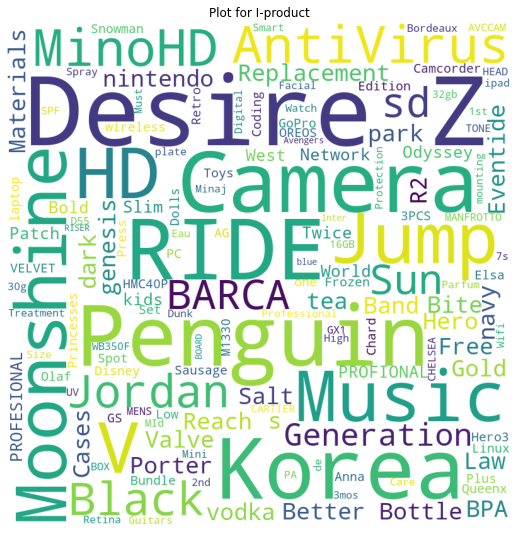

In [15]:
#get an idea of the kind of words that correspond to each BIO tag
for key in list(train_data.keys()):
    if key=='O':
        plot_word_cloud(key,False)
    else:
        plot_word_cloud(key,True)